<a href="https://colab.research.google.com/github/mvs22/Comunicacoes_moveis/blob/main/projeto_comunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução:
  Um sistema de localização pode ser definido como um sistema que permite localizar algo ou alguém em relação a uma posição conhecida, geralmente, num ambiente controlado. Para o projeto foi solicitado a implementação de dois ou mais métodos de localização. 

## Métodos básicos

### Fingerprint
  Essa técnica consiste em ter uma base de dados com amostras de informações como potência do sinal, time advance e/ou outros que mapeiam a região. A ideia do algoritmo é que esse banco de dados seja usado como um espaço de busca onde é possível comparar os sinais coletados em uma posição desconhecida com a base de dados para estimar qual ponto da base de dados é mais semelhante com a posição atual do objeto de interesse.

### Multilateração
  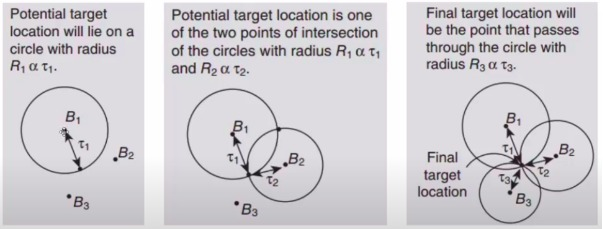
  
  Essa técnica se baseia na estimativa da distância do objeto de interesse (MUs) em relação com os objetos de referência(BTS). Essa estimativa pode ser feita por exemplo usando o tempo de propagação de uma mensagem enviada do objeto de referência e refletida pelo objeto de interesse.
Para trilateração temos:
di² = (xp - xi)²  +(yp - yi)²   i = 1,2,3
onde d é a distância estimada do objeto de interesse para o objeto de referência.
xp,yp é a latitude e longitude do objeto de interesse.
xi,yi é a latitude e longitude do i-ésimo objeto de referência.
d pode ser estimado usando modelos de propagação como Okumura-Hata e COST-231.
De posse de d e conhecendo todos os xi,yi podemos calcular a posição do objeto de interesse resolvendo o sistema de equações.

### Ferramentas utilizadas:
Como sugerido pelo professor, fizemos uso de Python devido às suas bibliotecas de machine learning. Para implementar os modelos de regressores usamos a biblioteca Sklearn pois é a biblioteca de machine learning que os membros do grupo são mais familiarizados. Para carregar os dados, limpar e calcular métricas estatísticas utilizamos a biblioteca pandas, fizemos uso também da bibliotecas matplotlib e seaborn para desenhar alguns gráficos e facilitar a visualização do problema dos dados e do resultado. 


### Soluções propostas:
-Fingerprint com busca calculando a distância euclidiana com a perda em espaço livre das estações rádio base
-Algoritmo usando machine learning inspirado no fingerprint utilizando regressão linear. Usa como features as perdas em espaço livre das estações rádio base e tem como saída a latitude e longitude do objeto.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("LocTreino_Equipe_1.csv")

In [3]:
len(df)

1500

In [4]:
df.head()

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
0,2025,-8.068464,-34.897129,106.790000,122.190,114.056667,123.456667,130.123333,111.190000,0.0,1,2,1,1,0.0
1,1073,-8.071859,-34.897263,104.056667,114.790,122.523333,104.023333,129.923333,114.323333,1.0,0,2,0,1,1.0
2,889,-8.072604,-34.896393,104.790000,114.990,114.256667,107.556667,126.190000,135.790000,1.0,0,2,0,1,1.0
3,1619,-8.069527,-34.889515,121.815000,135.215,132.565000,115.340000,100.790000,135.140000,0.0,1,3,1,0,1.0
4,2932,-8.060418,-34.905537,134.640000,120.090,129.190000,128.440000,137.040000,129.290000,3.0,3,3,3,3,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pontoId   1500 non-null   int64  
 1   lat       1500 non-null   float64
 2   lon       1500 non-null   float64
 3   pathBTS1  1500 non-null   float64
 4   pathBTS2  1500 non-null   float64
 5   pathBTS3  1500 non-null   float64
 6   pathBTS4  1500 non-null   float64
 7   pathBTS5  1500 non-null   float64
 8   pathBTS6  1499 non-null   float64
 9   taBTS1    1499 non-null   float64
 10  taBTS2    1500 non-null   int64  
 11  taBTS3    1500 non-null   int64  
 12  taBTS4    1500 non-null   int64  
 13  taBTS5    1500 non-null   int64  
 14  taBTS6    1498 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 175.9 KB


segundo o professor, time advance deveria ser um inteiro entre 0 e 63 (representa passos de 550 metros).... então vamos fazer um cast de float para inteiro

In [6]:
df = df.dropna()

In [7]:
df.taBTS1 = df.taBTS1.astype('int64')
df.taBTS6 = df.taBTS6.astype('int64')
df["pathBTS1"] = df["pathBTS1"].astype(float)
df["pathBTS2"] = df["pathBTS2"].astype(float)
df["pathBTS3"] = df["pathBTS3"].astype(float)
df["pathBTS4"] = df["pathBTS4"].astype(float)
df["pathBTS5"] = df["pathBTS5"].astype(float)
df["pathBTS6"] = df["pathBTS6"].astype(float)

In [8]:
df.describe(include="all")

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,1439.524733,-8.070247,-34.895093,116.413469,118.708401,123.592616,115.980256,122.051927,126.663599,0.760695,0.985963,2.457219,0.985963,1.140374,1.123663
std,851.146153,0.004239,0.004318,12.123122,12.534384,9.183161,12.338160,12.475839,27.802419,1.448867,0.818966,0.966067,0.818966,0.838266,1.120834
min,1.000000,-8.077576,-34.906830,85.690000,76.423333,88.790000,84.056667,80.123333,87.523333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,699.750000,-8.073529,-34.898252,106.590000,111.381667,118.935833,107.056667,114.315000,115.835833,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
50%,1392.500000,-8.070139,-34.895741,117.556667,119.523333,124.190000,116.606667,123.512561,128.656667,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,2172.250000,-8.067198,-34.891866,124.723333,128.565000,129.752500,125.798333,131.002500,136.056667,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000
max,2955.000000,-8.059339,-34.885078,144.290000,144.890000,145.890000,145.423333,146.890000,779.603100,33.000000,4.000000,5.000000,4.000000,3.000000,25.000000


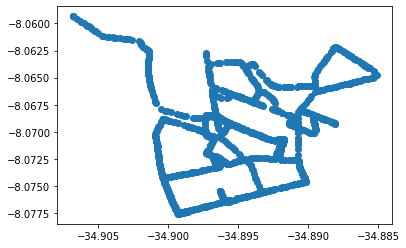

In [9]:
plt.scatter(df.lon, df.lat)

### verificando os time advance:

{'boxes': [<matplotlib.lines.Line2D at 0x7f7f1a0d48d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7f1a0dc950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f1a0c4e10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f1a0e3450>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7f1a0d4e90>,
  <matplotlib.lines.Line2D at 0x7f7f1a037fd0>]}

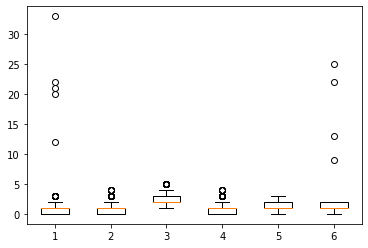

In [10]:
fig1, ax1 = plt.subplots()
data = [df.taBTS1,df.taBTS2,df.taBTS3,df.taBTS4,df.taBTS5,df.taBTS6]
ax1.boxplot(data)

### verificando as perdas em espaço livre:

#

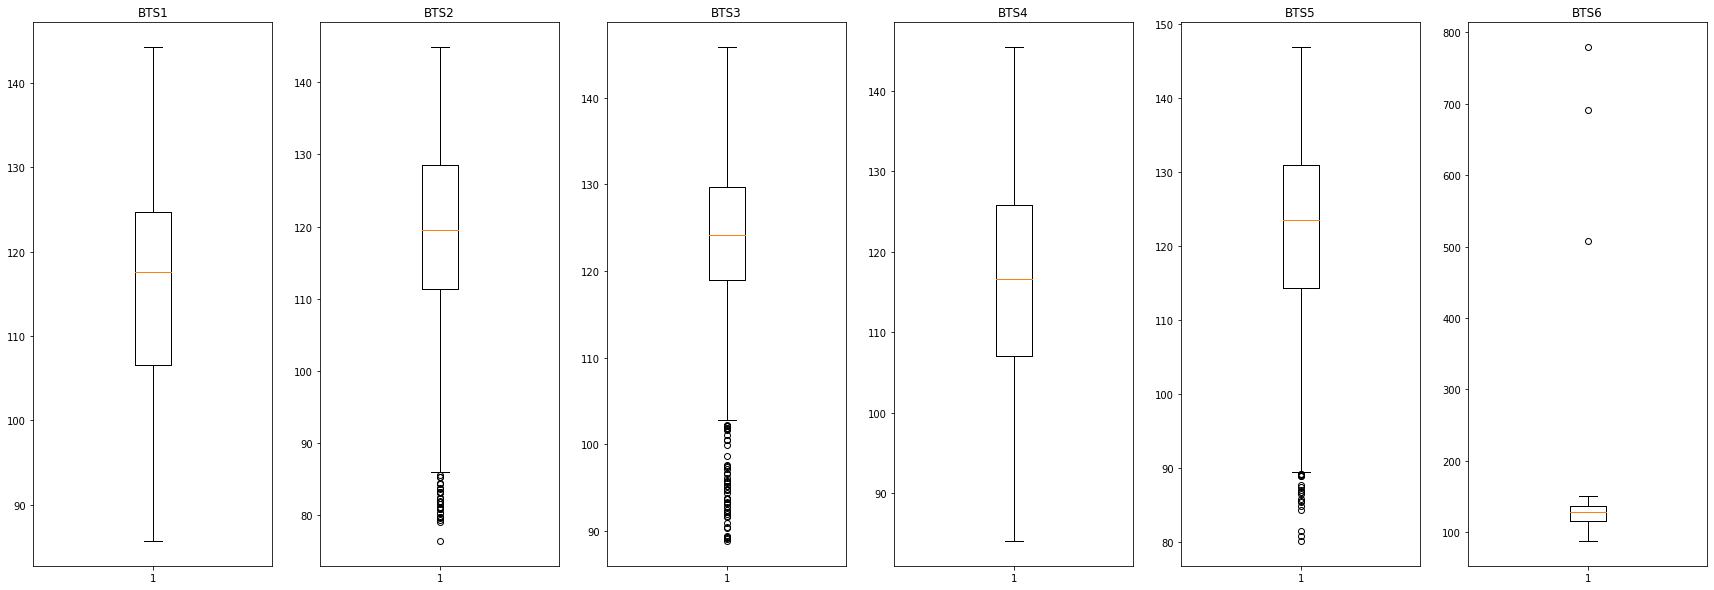

In [11]:
fig, axs = plt.subplots(1, 6,figsize=(30,10))
for i, ax in enumerate(axs):
  ax.set_title(f'BTS{i+1}')
  ax.boxplot(df[f'pathBTS{i+1}'])

As antenas 1,4 e 6 parecem mais confiaveis pela menor presença de outliers...

## dividindo em train test split

In [12]:
df.sample(frac=1)
x_train = df.loc[:len(df)*0.8,['pathBTS1',	'pathBTS2',	'pathBTS3',	'pathBTS4',	'pathBTS5',	'pathBTS6']]
Y_train = df.loc[:len(df)*0.8,['lat','lon']]
x_test = df.loc[len(df)*0.8:,['pathBTS1',	'pathBTS2',	'pathBTS3',	'pathBTS4',	'pathBTS5',	'pathBTS6']]
Y_test = df.loc[len(df)*0.8:,['lat','lon']]

# fingerprint

### distancia euclidiana

In [13]:
import math

def vector_subtract(v,w):
  return [v_i - w_i for v_i, w_i in zip(v,w)]

def dot(v,w):
  return sum(v_i * w_i for v_i, w_i in zip(v,w))

def sum_of_squares(v):
  return dot(v,v)

def magnitude(v):
  return math.sqrt(sum_of_squares(v))

def distance(v,w):
  return magnitude(vector_subtract(v,w))

In [14]:
# recebe um vetor [pathBTS1,	pathBTS2,	pathBTS3,	pathBTS4,	pathBTS5,	pathBTS6]
# e o df com as colunas [lat,	lon,	pathBTS1,	pathBTS2,	pathBTS3,	pathBTS4,	pathBTS5,	pathBTS6]
def fingerprint(v,df):
  df2 = df[['pathBTS1',	'pathBTS2',	'pathBTS3',	'pathBTS4',	'pathBTS5',	'pathBTS6']]
  #print(df2.head())
  
  df['distance'] = [distance(list(w),list(v)) for w in df.values.tolist()]
  df = df.sort_values(by='distance',ascending=True)
  df = df.reset_index()
  return df.loc[0, ['lat','lon']]

In [15]:
v = [106,	122,	114,	123,	130,	111]
df = x_train.copy()
df['lat'] = Y_train['lat']
df['lon'] = Y_train['lon']
fingerprint(v,df)

lat    -8.068464
lon   -34.897129
Name: 0, dtype: float64

In [16]:
Y_pred = [list(fingerprint(v,df)) for _,v in x_test.iterrows()]

In [17]:
df2 = Y_test.copy()

In [18]:
df2['lat_pred'] = [lat for lat,_ in Y_pred]
df2['lon_pred'] = [lon for _,lon in Y_pred]

In [19]:
df2.head()

,lat,lon,lat_pred,lon_pred
1197,-8.063300,-34.888748,-8.062314,-34.888191
1198,-8.073273,-34.896534,-8.073298,-34.896614
1199,-8.072737,-34.896683,-8.072637,-34.896503
1200,-8.072272,-34.896671,-8.070513,-34.896694
1201,-8.062998,-34.897293,-8.062858,-34.897293


In [20]:
df2['lat_diff'] = df2['lat'] - df2['lat_pred']
df2['lon_diff'] = df2['lon'] - df2['lon_pred']

In [21]:
df2.head()

,lat,lon,lat_pred,lon_pred,lat_diff,lon_diff
1197,-8.063300,-34.888748,-8.062314,-34.888191,-0.000986,-0.000557
1198,-8.073273,-34.896534,-8.073298,-34.896614,0.000025,0.000080
1199,-8.072737,-34.896683,-8.072637,-34.896503,-0.000100,-0.000180
1200,-8.072272,-34.896671,-8.070513,-34.896694,-0.001759,0.000023
1201,-8.062998,-34.897293,-8.062858,-34.897293,-0.000140,0.000000


In [22]:
df2.describe()

,lat,lon,lat_pred,lon_pred,lat_diff,lon_diff
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,-8.070061,-34.895115,-8.070105,-34.895207,0.000044,0.000091
std,0.004441,0.004547,0.004472,0.004551,0.000984,0.001292
min,-8.077541,-34.906830,-8.077494,-34.906731,-0.003400,-0.008538
25%,-8.073686,-34.898548,-8.073777,-34.898403,-0.000188,-0.000163
50%,-8.070069,-34.895865,-8.070199,-34.896023,0.000014,-0.000004
75%,-8.066989,-34.891205,-8.066831,-34.891490,0.000222,0.000179
max,-8.059339,-34.885319,-8.059394,-34.885262,0.006923,0.011879


In [23]:
df2['lat_diff_metros'] = df2['lat_diff'] * 30.87 * 1000
df2['lon_diff_metros'] = df2['lon_diff'] * 30.87 * 1000

In [24]:
import math
df2['diff_metros'] = [math.sqrt(lat_diff**2+lon_diff**2) for lat_diff,lon_diff in zip(df2['lat_diff_metros'],df2['lon_diff_metros'])]

In [25]:
df2['diff_metros'].describe()

count    302.000000
mean      25.958906
std       42.959451
min        0.123480
25%        3.255307
50%       11.117786
75%       29.527487
max      424.435637
Name: diff_metros, dtype: float64

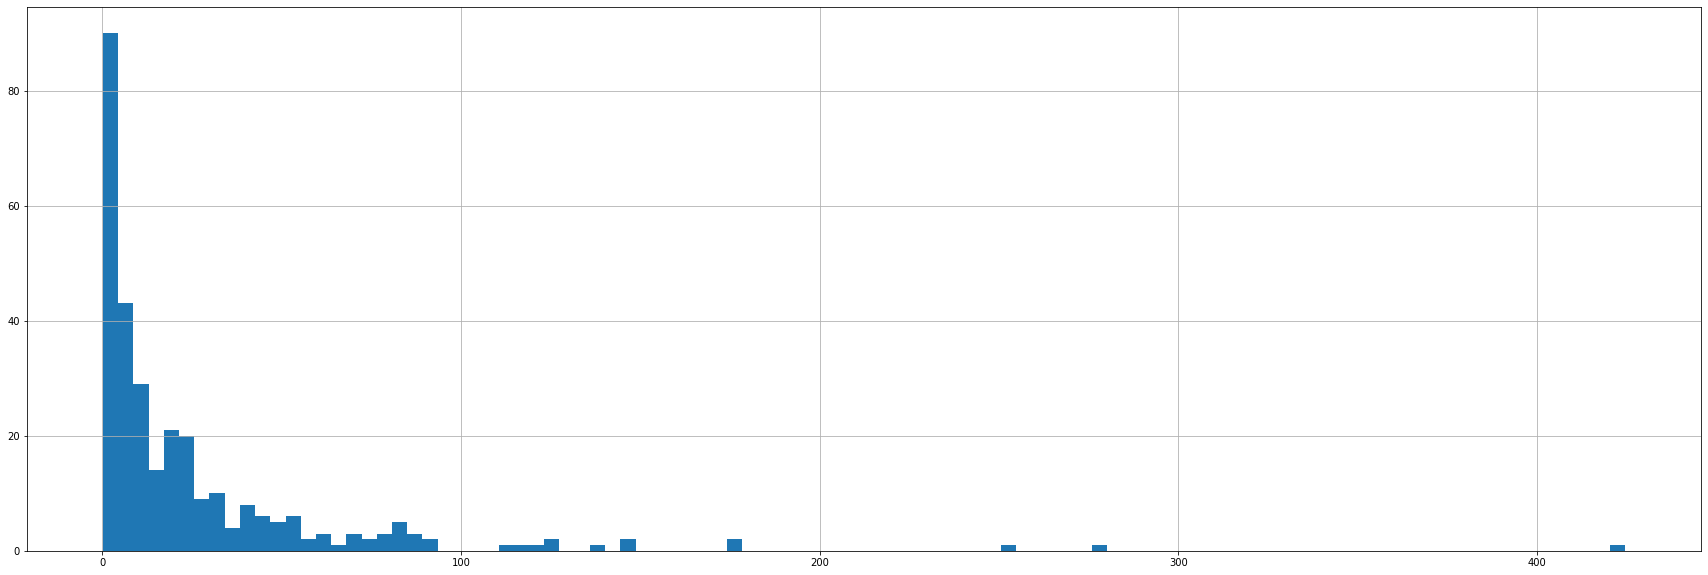

In [26]:
df2['diff_metros'].hist(bins=100,figsize=(30,10))

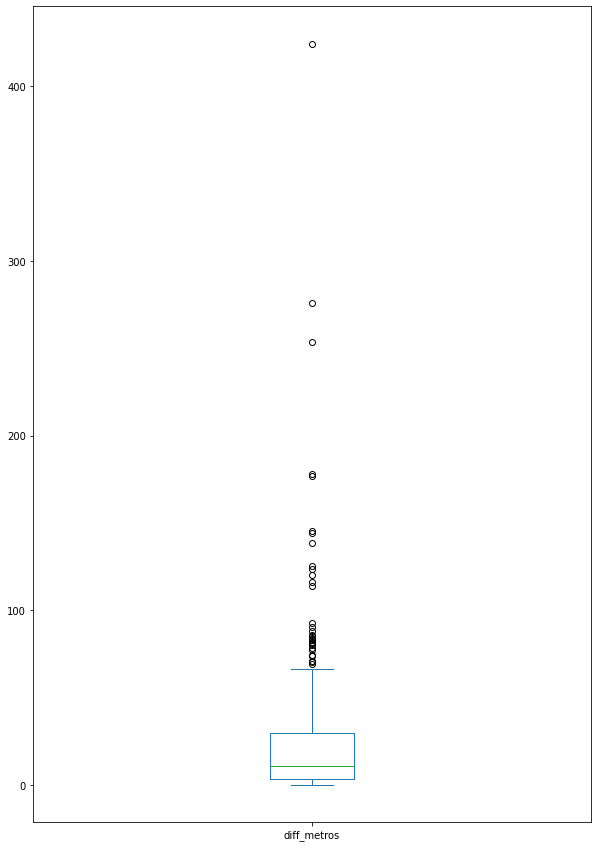

In [27]:
df2['diff_metros'].plot(kind='box',figsize=(10,15))

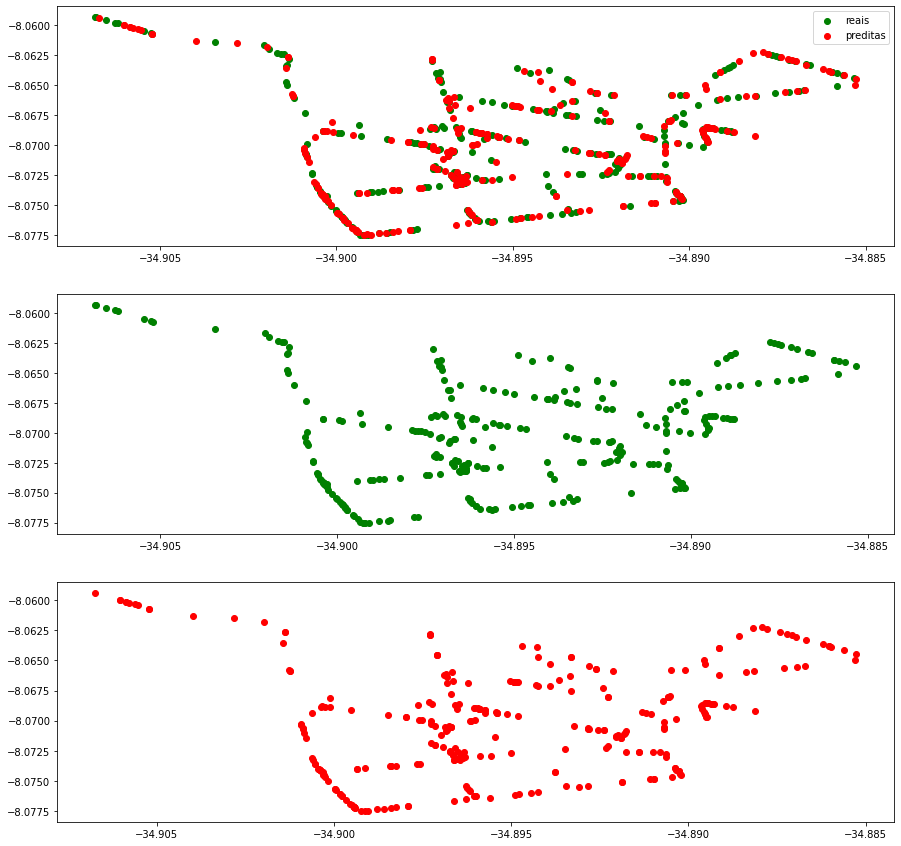

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,15))
ax1.scatter(df2['lon'],df2['lat'], c='green')
ax1.scatter(df2['lon_pred'],df2['lat_pred'], c='red')
#ax1.title('Mapa de comparação:')
ax1.legend(["reais","preditas"])

ax2.scatter(df2['lon'],df2['lat'], c='green')
#ax2.title('Reais:')

ax3.scatter(df2['lon_pred'],df2['lat_pred'], c='red')
#ax3.title('Preditas')


fig.show()

### distancia de manhatan

In [29]:
import math
def distance(v,w):
  return sum([math.fabs(x) for x in vector_subtract(v,w)])

In [30]:
Y_pred = [list(fingerprint(v,df)) for _,v in x_test.iterrows()]

In [31]:
df2 = Y_test.copy()

In [ ]:
df2.head()

In [35]:
df2['lat_pred'] = [lat for lat,_ in Y_pred]
df2['lon_pred'] = [lon for _,lon in Y_pred]
df2['lat_diff'] = df2['lat'] - df2['lat_pred']
df2['lon_diff'] = df2['lon'] - df2['lon_pred']
df2['lat_diff_metros'] = df2['lat_diff'] * 30.87 * 1000
df2['lon_diff_metros'] = df2['lon_diff'] * 30.87 * 1000


In [36]:
import math
df2['diff_metros'] = [math.sqrt(lat_diff**2+lon_diff**2) for lat_diff,lon_diff in zip(df2['lat_diff_metros'],df2['lon_diff_metros'])]

In [ ]:
df2['diff_metros'].describe()

In [ ]:
df2['diff_metros'].hist(bins=100,figsize=(30,10))

In [ ]:
df2['diff_metros'].plot(kind='box',figsize=(10,15))

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,15))
ax1.scatter(df2['lon'],df2['lat'], c='green')
ax1.scatter(df2['lon_pred'],df2['lat_pred'], c='red')
ax1.legend(["reais","preditas"])
ax2.scatter(df2['lon'],df2['lat'], c='green')
ax3.scatter(df2['lon_pred'],df2['lat_pred'], c='red')

fig.show()

### Bray-curtis

In [43]:
import math
def vector_sum(v,w):
  return [v_i + w_i for v_i, w_i in zip(v,w)]
def distance(v,w):
  return sum([math.fabs(x) for x in vector_subtract(v,w)]) / math.fabs(sum(vector_sum(v,w)))

In [44]:
Y_pred = [list(fingerprint(v,df)) for _,v in x_test.iterrows()]

In [45]:
df2 = Y_test.copy()

In [ ]:
df2.head()

In [47]:
df2['lat_pred'] = [lat for lat,_ in Y_pred]
df2['lon_pred'] = [lon for _,lon in Y_pred]
df2['lat_diff'] = df2['lat'] - df2['lat_pred']
df2['lon_diff'] = df2['lon'] - df2['lon_pred']
df2['lat_diff_metros'] = df2['lat_diff'] * 30.87 * 1000
df2['lon_diff_metros'] = df2['lon_diff'] * 30.87 * 1000


In [48]:
df2['diff_metros'] = [math.sqrt(lat_diff**2+lon_diff**2) for lat_diff,lon_diff in zip(df2['lat_diff_metros'],df2['lon_diff_metros'])]

In [ ]:
df2['diff_metros'].describe()

In [ ]:
df2['diff_metros'].hist(bins=100,figsize=(30,10))

In [ ]:
df2['diff_metros'].plot(kind='box',figsize=(10,15))

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,15))
ax1.scatter(df2['lon'],df2['lat'], c='green')
ax1.scatter(df2['lon_pred'],df2['lat_pred'], c='red')
ax1.legend(["reais","preditas"])
ax2.scatter(df2['lon'],df2['lat'], c='green')
ax3.scatter(df2['lon_pred'],df2['lat_pred'], c='red')

fig.show()

# Treinando um regressor usando sklearn

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(x_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(x_test)

In [ ]:
model.score(x_test, Y_test)

0.4492156981326766

## KneighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()


In [ ]:
model.fit(x_train,Y_train)

KNeighborsRegressor()

In [ ]:
Y_pred = model.predict(x_test)

In [ ]:
model.score(x_test, Y_test)

0.9469968392812563

In [ ]:
print(Y_test)

           lat        lon
1197 -8.063300 -34.888748
1198 -8.073273 -34.896534
1199 -8.072737 -34.896683
1200 -8.072272 -34.896671
1201 -8.062998 -34.897293
...        ...        ...
1495 -8.073855 -34.898685
1496 -8.065498 -34.886887
1497 -8.067300 -34.893856
1498 -8.069776 -34.897877
1499 -8.063534 -34.894882

[302 rows x 2 columns]


In [ ]:
df2 = Y_test.copy()

In [ ]:
df2['lat_pred'] = [lat for lat,_ in Y_pred]
df2['lon_pred'] = [lon for _,lon in Y_pred]

In [ ]:
df2.head()

,lat,lon,lat_pred,lon_pred
1197,-8.063300,-34.888748,-8.062676,-34.888401
1198,-8.073273,-34.896534,-8.073425,-34.897158
1199,-8.072737,-34.896683,-8.072295,-34.896599
1200,-8.072272,-34.896671,-8.072301,-34.896546
1201,-8.062998,-34.897293,-8.063231,-34.897045


In [ ]:
df2['lat_diff'] = df2['lat'] - df2['lat_pred']
df2['lon_diff'] = df2['lon'] - df2['lon_pred']

In [ ]:
df2.head()

,lat,lon,lat_pred,lon_pred,lat_diff,lon_diff
1197,-8.063300,-34.888748,-8.062676,-34.888401,-0.000624,-0.000347
1198,-8.073273,-34.896534,-8.073425,-34.897158,0.000152,0.000624
1199,-8.072737,-34.896683,-8.072295,-34.896599,-0.000442,-0.000084
1200,-8.072272,-34.896671,-8.072301,-34.896546,0.000029,-0.000125
1201,-8.062998,-34.897293,-8.063231,-34.897045,0.000233,-0.000248


In [ ]:
df2.describe()

,lat,lon,lat_pred,lon_pred,lat_diff,lon_diff
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,-8.070061,-34.895115,-8.070158,-34.895156,0.000097,0.000041
std,0.004441,0.004547,0.004331,0.004288,0.000847,0.001195
min,-8.077541,-34.906830,-8.077450,-34.904887,-0.004059,-0.007669
25%,-8.073686,-34.898548,-8.073796,-34.898349,-0.000246,-0.000264
50%,-8.070069,-34.895865,-8.070190,-34.896095,0.000053,-0.000002
75%,-8.066989,-34.891205,-8.067003,-34.891778,0.000374,0.000365
max,-8.059339,-34.885319,-8.060262,-34.885755,0.003343,0.007748


Como calcular a distancia em metros entre duas coordenadas geograficas????

https://www.pilotopolicial.com.br/como-calcular-a-precisao-de-uma-coordenada-geografica/

In [ ]:
df2['lat_diff'] = df2['lat_diff'] *1000
df2['lon_diff'] = df2['lon_diff'] *1000

In [ ]:
df2.head()

,lat,lon,lat_pred,lon_pred,lat_diff,lon_diff
1197,-8.063300,-34.888748,-8.062676,-34.888401,-0.6242,-0.3472
1198,-8.073273,-34.896534,-8.073425,-34.897158,0.1524,0.6240
1199,-8.072737,-34.896683,-8.072295,-34.896599,-0.4418,-0.0842
1200,-8.072272,-34.896671,-8.072301,-34.896546,0.0286,-0.1250
1201,-8.062998,-34.897293,-8.063231,-34.897045,0.2326,-0.2478


In [ ]:
df2['lat_diff_metros'] = df2['lat_diff'] * 30.87 
df2['lon_diff_metros'] = df2['lon_diff'] * 30.87

In [ ]:
df2.head()

,lat,lon,lat_pred,lon_pred,lat_diff,lon_diff,lat_diff_metros,lon_diff_metros
1197,-8.063300,-34.888748,-8.062676,-34.888401,-0.6242,-0.3472,-19.269054,-10.718064
1198,-8.073273,-34.896534,-8.073425,-34.897158,0.1524,0.6240,4.704588,19.262880
1199,-8.072737,-34.896683,-8.072295,-34.896599,-0.4418,-0.0842,-13.638366,-2.599254
1200,-8.072272,-34.896671,-8.072301,-34.896546,0.0286,-0.1250,0.882882,-3.858750
1201,-8.062998,-34.897293,-8.063231,-34.897045,0.2326,-0.2478,7.180362,-7.649586


In [ ]:
df2.describe()

,lat,lon,lat_pred,lon_pred,lat_diff,lon_diff,lat_diff_metros,lon_diff_metros
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,-8.070061,-34.895115,-8.070158,-34.895156,0.097304,0.040940,3.003774,1.263830
std,0.004441,0.004547,0.004331,0.004288,0.846868,1.195071,26.142829,36.891845
min,-8.077541,-34.906830,-8.077450,-34.904887,-4.058600,-7.669400,-125.288982,-236.754378
25%,-8.073686,-34.898548,-8.073796,-34.898349,-0.245950,-0.263800,-7.592476,-8.143506
50%,-8.070069,-34.895865,-8.070190,-34.896095,0.053100,-0.002400,1.639197,-0.074088
75%,-8.066989,-34.891205,-8.067003,-34.891778,0.373950,0.365250,11.543837,11.275267
max,-8.059339,-34.885319,-8.060262,-34.885755,3.343200,7.748200,103.204584,239.186934


In [ ]:
import math
df2['diff_metros'] = [math.sqrt(lat_diff**2+lon_diff**2) for lat_diff,lon_diff in zip(df2['lat_diff_metros'],df2['lon_diff_metros'])]

In [ ]:
df2['diff_metros'].describe()

count    302.000000
mean      29.257133
std       34.587387
min        0.171210
25%        9.109061
50%       18.473928
75%       34.792298
max      254.439222
Name: diff_metros, dtype: float64

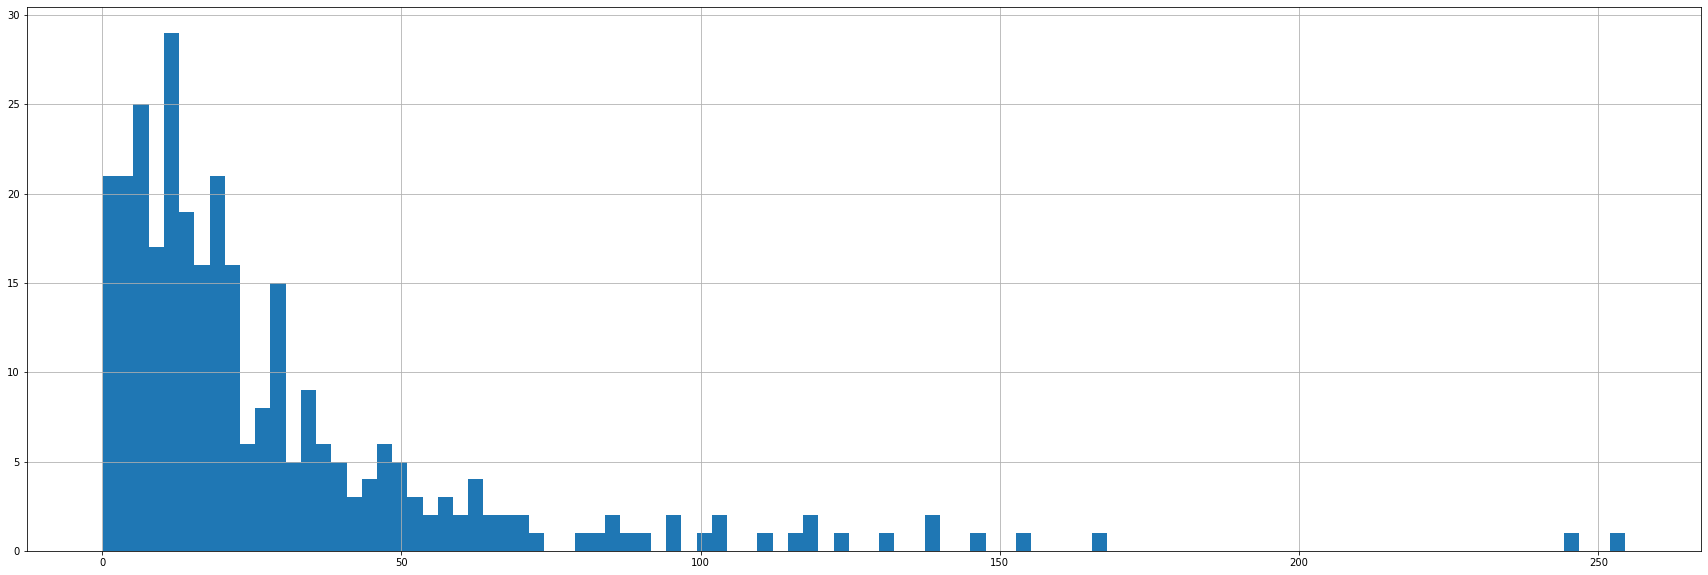

In [ ]:
df2['diff_metros'].hist(bins=100,figsize=(30,10))

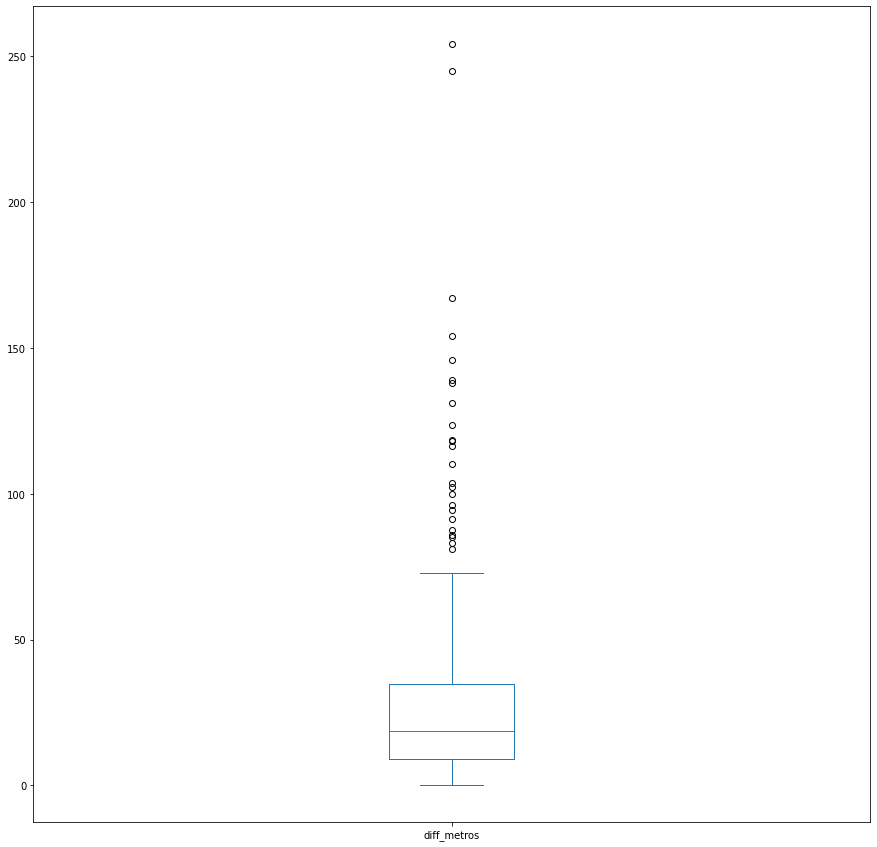

In [ ]:
df2['diff_metros'].plot(kind='box',figsize=(15,15))

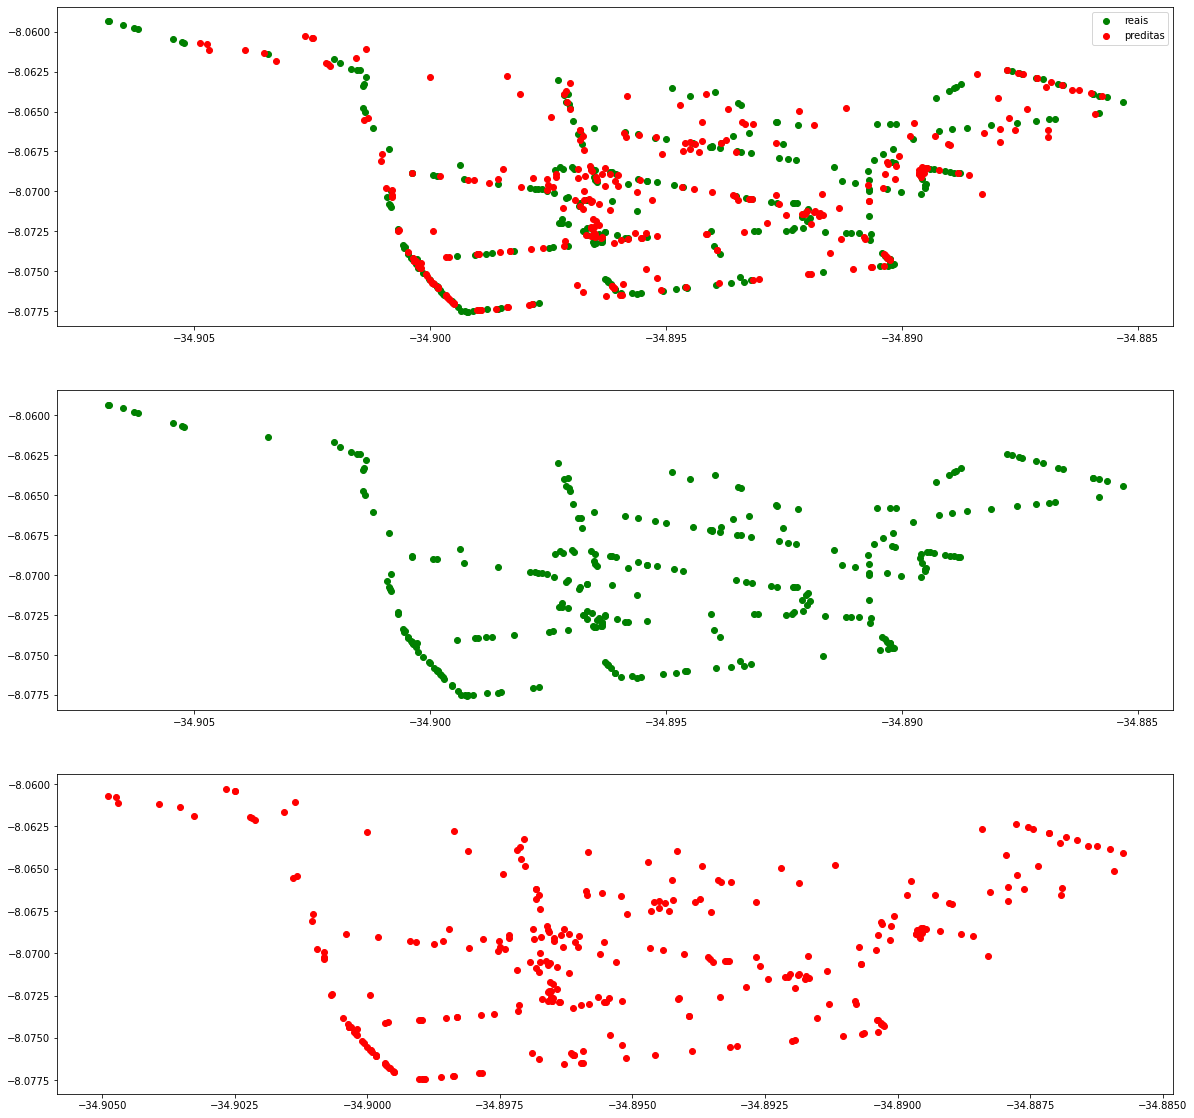

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(20,20))
ax1.scatter(df2['lon'],df2['lat'], c='green')
ax1.scatter(df2['lon_pred'],df2['lat_pred'], c='red')
#ax1.title('Mapa de comparação:')
ax1.legend(["reais","preditas"])

ax2.scatter(df2['lon'],df2['lat'], c='green')
#ax2.title('Reais:')

ax3.scatter(df2['lon_pred'],df2['lat_pred'], c='red')
#ax3.title('Preditas')


fig.show()

### tentando melhorar o resultado usando o optuna

In [ ]:
!pip install optuna
import optuna
#classes = list(set(y_df))
#Step 1. Define an objective function to be maximized.
def objective(trial):
    
    # Step 2. Setup values for the hyperparameters:
    weights= trial.suggest_categorical("weights", ["uniform","distance"])
    n_neighbors= trial.suggest_int("n_neighbors",2,10)

    algorithm = trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree","brute"])
    leaf_size= trial.suggest_int("leaf_size",10,50)

    classifier_obj = KNeighborsRegressor(weights=weights, n_neighbors=n_neighbors,algorithm=algorithm,leaf_size=leaf_size)
    #for step in range(100):
    classifier_obj.fit(x_train,Y_train)
    
    # Report intermediate objective value.
    Y_pred = classifier_obj.predict(x_test)
    intermediate_value = classifier_obj.score(x_test, Y_test)
    trial.report(intermediate_value, 1)

    # Handle pruning based on the intermediate value.
    if trial.should_prune():
        raise optuna.TrialPruned()
    return intermediate_value

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

[I 2022-05-04 02:00:36,476] A new study created in memory with name: no-name-61ef25ff-dd71-4467-9d90-933adc01bf14
[I 2022-05-04 02:00:36,501] Trial 0 finished with value: 0.9458352145024187 and parameters: {'weights': 'uniform', 'n_neighbors': 6, 'algorithm': 'kd_tree', 'leaf_size': 49}. Best is trial 0 with value: 0.9458352145024187.
[I 2022-05-04 02:00:36,538] Trial 1 finished with value: 0.9380085193965457 and parameters: {'weights': 'uniform', 'n_neighbors': 10, 'algorithm': 'brute', 'leaf_size': 37}. Best is trial 0 with value: 0.9458352145024187.
[I 2022-05-04 02:00:36,567] Trial 2 finished with value: 0.9458219383634339 and parameters: {'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'kd_tree', 'leaf_size': 35}. Best is trial 0 with value: 0.9458352145024187.
[I 2022-05-04 02:00:36,608] Trial 3 finished with value: 0.9501124168460802 and parameters: {'weights': 'distance', 'n_neighbors': 7, 'algorithm': 'brute', 'leaf_size': 49}. Best is trial 3 with value: 0.9501124168460

  Number of finished trials:  100
  Number of pruned trials:  49
  Number of complete trials:  51


Os modelo com os hiperparametros do optuna, não impactaram tanto no resultado do modelo...

## DecisionTreeRegressor

In [54]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
model = DecisionTreeRegressor()


In [ ]:
model.fit(x_train,Y_train)

DecisionTreeRegressor()

In [ ]:
Y_pred = model.predict(x_test)

In [ ]:
model.score(x_test, Y_test)

0.6196285164455926

In [56]:
!pip install optuna
import optuna
#classes = list(set(y_df))
#Step 1. Define an objective function to be maximized.
def objective(trial):
    
    # Step 2. Setup values for the hyperparameters:
    criterion = trial.suggest_categorical("criterion", ["squared_error", "friedman_mse", "absolute_error"])
    splitter = trial.suggest_categorical("splitter", ["best", "random"])
    max_depth= trial.suggest_int("max_depth",2,40)



    classifier_obj = DecisionTreeRegressor(criterion=criterion, splitter=splitter,max_depth=max_depth)
    #for step in range(100):
    classifier_obj.fit(x_train,Y_train)
    
    # Report intermediate objective value.
    Y_pred = classifier_obj.predict(x_test)
    intermediate_value = classifier_obj.score(x_test, Y_test)
    trial.report(intermediate_value, 1)

    # Handle pruning based on the intermediate value.
    if trial.should_prune():
        raise optuna.TrialPruned()
    return intermediate_value

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

[I 2022-05-05 20:06:42,950] A new study created in memory with name: no-name-073bd190-3c2a-494c-8cfc-ac51e1621eb6
[I 2022-05-05 20:06:43,007] Trial 0 finished with value: 0.6591153506915255 and parameters: {'criterion': 'friedman_mse', 'splitter': 'random', 'max_depth': 36}. Best is trial 0 with value: 0.6591153506915255.
[I 2022-05-05 20:06:43,058] Trial 1 finished with value: 0.6434218949663592 and parameters: {'criterion': 'squared_error', 'splitter': 'best', 'max_depth': 20}. Best is trial 0 with value: 0.6591153506915255.
[I 2022-05-05 20:06:43,092] Trial 2 finished with value: 0.6745126326959126 and parameters: {'criterion': 'squared_error', 'splitter': 'best', 'max_depth': 28}. Best is trial 2 with value: 0.6745126326959126.
[I 2022-05-05 20:06:43,283] Trial 3 finished with value: 0.68814782486091 and parameters: {'criterion': 'absolute_error', 'splitter': 'best', 'max_depth': 5}. Best is trial 3 with value: 0.68814782486091.
[I 2022-05-05 20:06:43,338] Trial 4 finished with val

  Number of finished trials:  100
  Number of pruned trials:  50
  Number of complete trials:  50


In [57]:
#{'criterion': 'absolute_error', 'splitter': 'best', 'max_depth': 8}
model = DecisionTreeRegressor(criterion='absolute_error', splitter='best',max_depth=8)

In [58]:
model.fit(x_train,Y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=8)

In [59]:
Y_pred = model.predict(x_test)

In [60]:
model.score(x_test, Y_test)

0.7383476607850246

In [61]:
df2 = Y_test.copy()

In [62]:
df2['lat_pred'] = [lat for lat,_ in Y_pred]
df2['lon_pred'] = [lon for _,lon in Y_pred]
df2['lat_diff'] = df2['lat'] - df2['lat_pred']
df2['lon_diff'] = df2['lon'] - df2['lon_pred']
df2['lat_diff_metros'] = df2['lat_diff'] * 30.87 * 1000
df2['lon_diff_metros'] = df2['lon_diff'] * 30.87 * 1000

In [63]:
df2['diff_metros'] = [math.sqrt(lat_diff**2+lon_diff**2) for lat_diff,lon_diff in zip(df2['lat_diff_metros'],df2['lon_diff_metros'])]


In [64]:
df2['diff_metros'].describe()

count    302.000000
mean      53.413125
std       85.259956
min        0.069027
25%       11.444168
50%       25.029663
75%       56.563893
max      588.755101
Name: diff_metros, dtype: float64

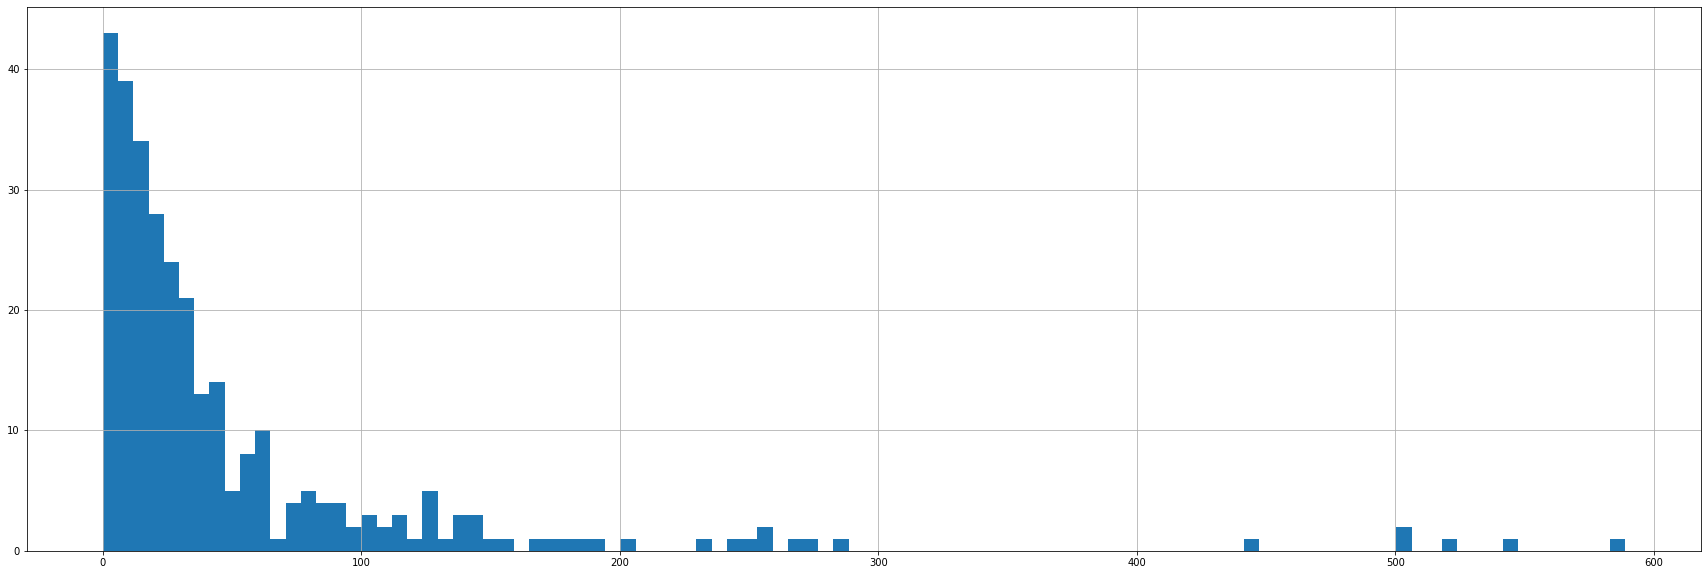

In [65]:
df2['diff_metros'].hist(bins=100,figsize=(30,10))

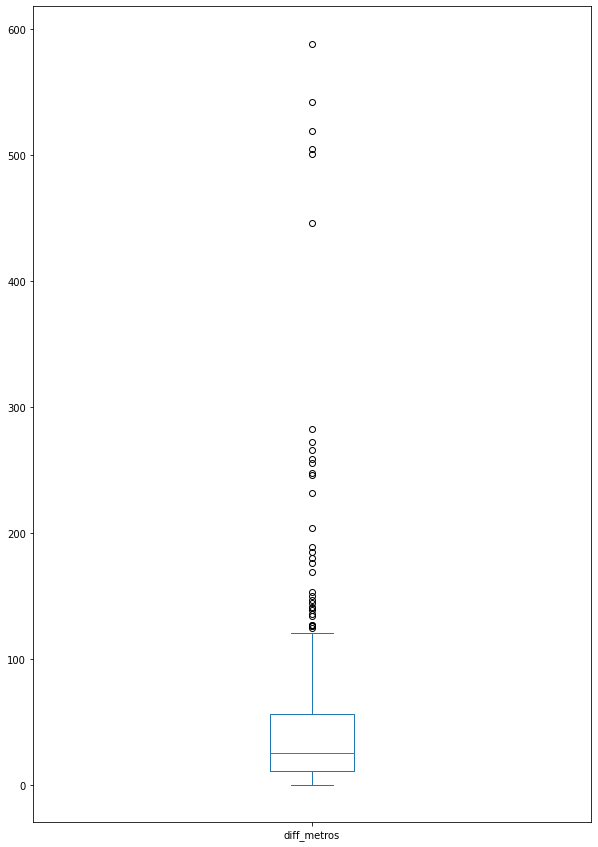

In [66]:
df2['diff_metros'].plot(kind='box',figsize=(10,15))

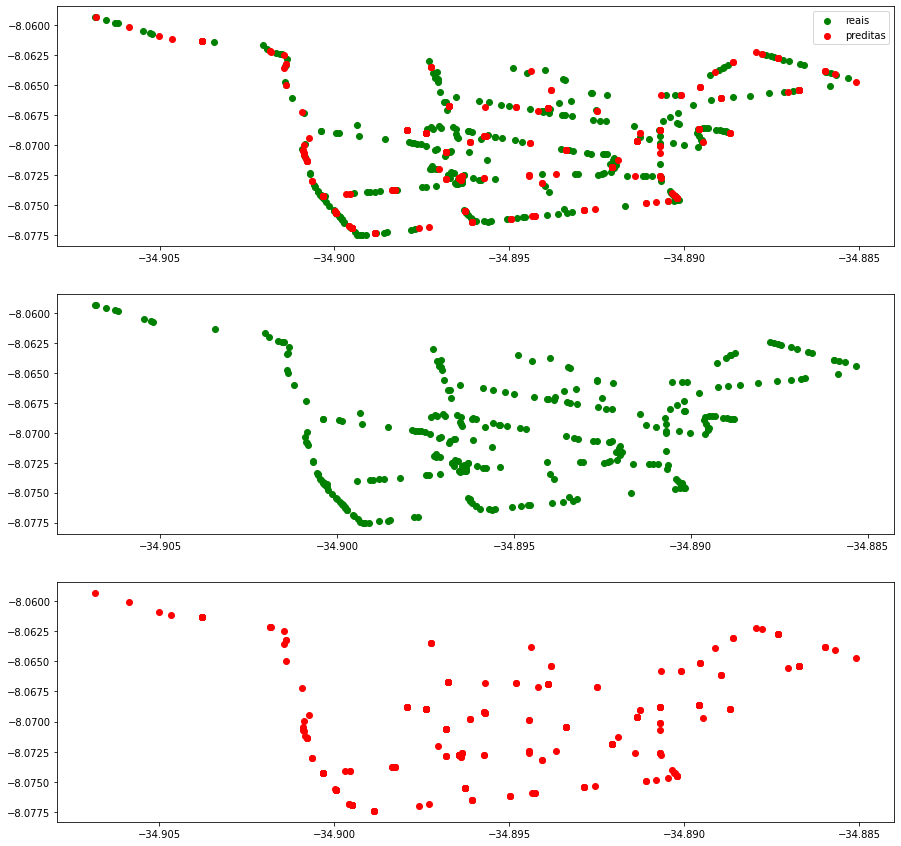

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,15))
ax1.scatter(df2['lon'],df2['lat'], c='green')
ax1.scatter(df2['lon_pred'],df2['lat_pred'], c='red')
ax1.legend(["reais","preditas"])
ax2.scatter(df2['lon'],df2['lat'], c='green')
ax3.scatter(df2['lon_pred'],df2['lat_pred'], c='red')

fig.show()

# RandomForest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
model = RandomForestRegressor()

In [70]:
model.fit(x_train,Y_train)

RandomForestRegressor()

In [71]:
Y_pred = model.predict(x_test)

In [72]:
model.score(x_test, Y_test)

0.8521284101554129

In [74]:
!pip install optuna
import optuna
#classes = list(set(y_df))
#Step 1. Define an objective function to be maximized.
def objective(trial):
    
    # Step 2. Setup values for the hyperparameters:
    criterion = trial.suggest_categorical("criterion", ["squared_error", "absolute_error"])
    max_depth= trial.suggest_int("max_depth",2,40)
    n_estimators= trial.suggest_int("n_estimators",10,200)
    max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])



    classifier_obj = RandomForestRegressor(criterion=criterion, n_estimators=n_estimators,max_depth=max_depth,max_features =max_features)
    #for step in range(100):
    classifier_obj.fit(x_train,Y_train)
    
    # Report intermediate objective value.
    Y_pred = classifier_obj.predict(x_test)
    intermediate_value = classifier_obj.score(x_test, Y_test)
    trial.report(intermediate_value, 1)

    # Handle pruning based on the intermediate value.
    if trial.should_prune():
        raise optuna.TrialPruned()
    return intermediate_value

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

[I 2022-05-05 20:20:33,670] A new study created in memory with name: no-name-ae0eb5a1-580f-4698-bb68-b2e0a05d22fb
[I 2022-05-05 20:20:40,967] Trial 0 finished with value: 0.8689757170163532 and parameters: {'criterion': 'absolute_error', 'max_depth': 27, 'n_estimators': 46, 'max_features': 'auto'}. Best is trial 0 with value: 0.8689757170163532.
[I 2022-05-05 20:20:41,166] Trial 1 finished with value: 0.8569876583488518 and parameters: {'criterion': 'squared_error', 'max_depth': 11, 'n_estimators': 19, 'max_features': 'log2'}. Best is trial 0 with value: 0.8689757170163532.
[I 2022-05-05 20:20:41,526] Trial 2 finished with value: 0.8424625828473002 and parameters: {'criterion': 'squared_error', 'max_depth': 35, 'n_estimators': 30, 'max_features': 'auto'}. Best is trial 0 with value: 0.8689757170163532.
[I 2022-05-05 20:21:01,174] Trial 3 finished with value: 0.8703576487293863 and parameters: {'criterion': 'absolute_error', 'max_depth': 31, 'n_estimators': 174, 'max_features': 'auto'}.

  Number of finished trials:  100
  Number of pruned trials:  62
  Number of complete trials:  38


In [75]:
#{'criterion': 'absolute_error', 'max_depth': 23, 'n_estimators': 126, 'max_features': 'sqrt'}
model = RandomForestRegressor(criterion='absolute_error', max_depth=23, n_estimators=126, max_features='sqrt')

In [76]:
model.fit(x_train,Y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=23,
                      max_features='sqrt', n_estimators=126)

In [77]:
Y_pred = model.predict(x_test)

In [78]:
model.score(x_test, Y_test)

0.8807712996088308

In [79]:
df2 = Y_test.copy()


In [80]:
df2['lat_pred'] = [lat for lat,_ in Y_pred]
df2['lon_pred'] = [lon for _,lon in Y_pred]
df2['lat_diff'] = df2['lat'] - df2['lat_pred']
df2['lon_diff'] = df2['lon'] - df2['lon_pred']
df2['lat_diff_metros'] = df2['lat_diff'] * 30.87 * 1000
df2['lon_diff_metros'] = df2['lon_diff'] * 30.87 * 1000


In [81]:
df2['diff_metros'] = [math.sqrt(lat_diff**2+lon_diff**2) for lat_diff,lon_diff in zip(df2['lat_diff_metros'],df2['lon_diff_metros'])]


In [82]:
df2['diff_metros'].describe()


count    302.000000
mean      45.363959
std       50.532941
min        0.924416
25%       14.157982
50%       28.815678
75%       57.074422
max      335.526187
Name: diff_metros, dtype: float64

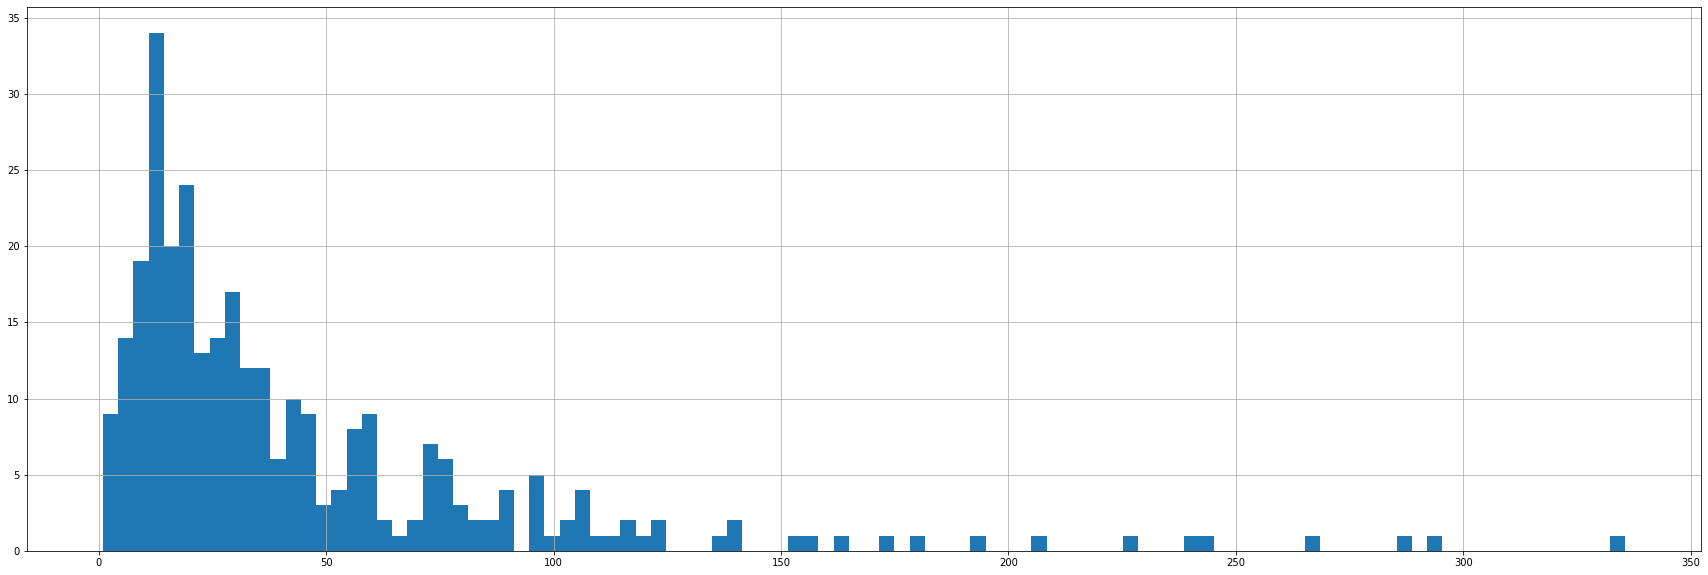

In [83]:
df2['diff_metros'].hist(bins=100,figsize=(30,10))


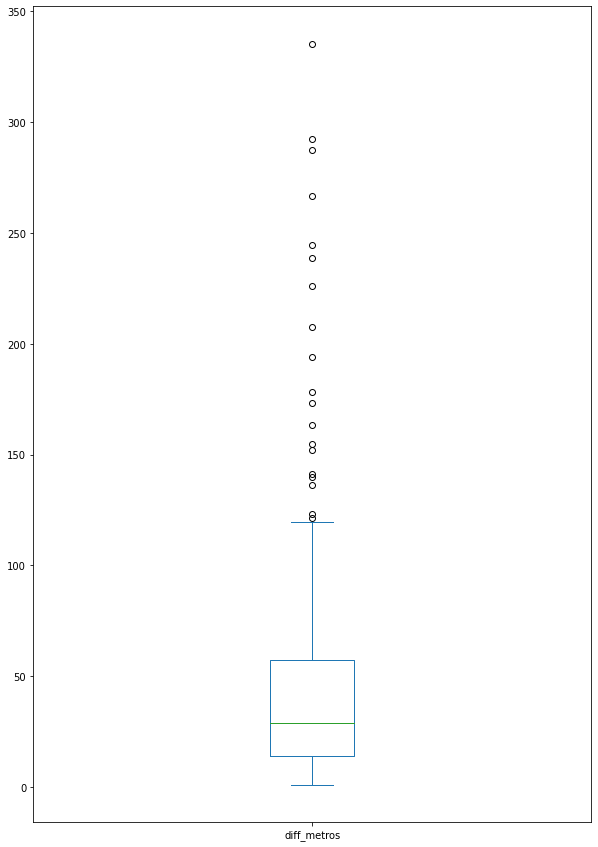

In [84]:
df2['diff_metros'].plot(kind='box',figsize=(10,15))


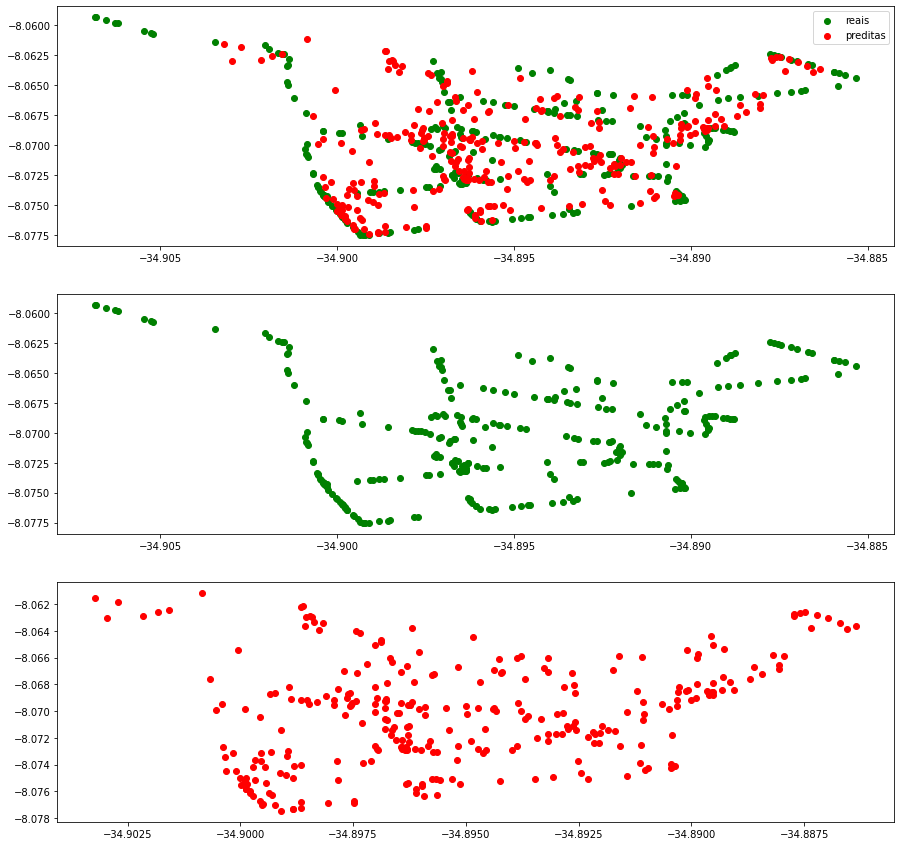

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15,15))
ax1.scatter(df2['lon'],df2['lat'], c='green')
ax1.scatter(df2['lon_pred'],df2['lat_pred'], c='red')
ax1.legend(["reais","preditas"])
ax2.scatter(df2['lon'],df2['lat'], c='green')
ax3.scatter(df2['lon_pred'],df2['lat_pred'], c='red')

fig.show()

KneighborsRegressor teve o melhor resultado...

# SUBMIT

In [ ]:
df = pd.read_csv("submit.csv")

In [ ]:
df.head()

,pontoId,lat,lon
0,1365,-8.51,-34.51
1,2381,-8.51,-34.51
2,2644,-8.51,-34.51
3,2224,-8.51,-34.51
4,2568,-8.51,-34.51


In [ ]:
df.describe(include="all")

,pontoId,lat,lon
count,200.000000,2.000000e+02,2.000000e+02
mean,1415.625000,-8.510000e+00,-3.451000e+01
std,884.330064,7.123258e-15,1.495884e-13
min,17.000000,-8.510000e+00,-3.451000e+01
25%,624.750000,-8.510000e+00,-3.451000e+01
50%,1381.000000,-8.510000e+00,-3.451000e+01
75%,2215.250000,-8.510000e+00,-3.451000e+01
max,2954.000000,-8.510000e+00,-3.451000e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pontoId  200 non-null    int64  
 1   lat      200 non-null    float64
 2   lon      200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


# DADOS BTS

In [ ]:
df = pd.read_csv("Dados_BTSs.csv")

In [ ]:
df

,name,lat,lon,band,bcch,eirp,bts
0,136_2,-8.068361,-34.892722,GSM1800,662,55.59,BTS-1
1,137_3,-8.075917,-34.894611,GSM1800,806,55.59,BTS-2
2,197_1,-8.076361,-34.908000,GSM1800,666,55.59,BTS-3
3,137_1,-8.075917,-34.894611,GSM1800,690,55.59,BTS-4
4,138_2,-8.066000,-34.889444,GSM1800,673,55.59,BTS-5
5,245_2,-8.064583,-34.894583,GSM1800,682,55.59,BTS-6


In [ ]:
df.describe(include="all")

,name,lat,lon,band,bcch,eirp,bts
count,6,6.000000,6.000000,6,6.000000,6.000000e+00,6
unique,6,NaN,NaN,1,NaN,NaN,6
top,136_2,NaN,NaN,GSM1800,NaN,NaN,BTS-1
freq,1,NaN,NaN,6,NaN,NaN,1
mean,NaN,-8.071190,-34.895662,NaN,696.500000,5.559000e+01,NaN
std,NaN,0.005477,0.006370,NaN,54.617763,7.783606e-15,NaN
min,NaN,-8.076361,-34.908000,NaN,662.000000,5.559000e+01,NaN
25%,NaN,-8.075917,-34.894611,NaN,667.750000,5.559000e+01,NaN
50%,NaN,-8.072139,-34.894597,NaN,677.500000,5.559000e+01,NaN
75%,NaN,-8.066590,-34.893187,NaN,688.000000,5.559000e+01,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    6 non-null      object 
 1   lat     6 non-null      float64
 2   lon     6 non-null      float64
 3   band    6 non-null      object 
 4   bcch    6 non-null      int64  
 5   eirp    6 non-null      float64
 6   bts     6 non-null      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 464.0+ bytes
